In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [180]:
df = pd.read_csv('datasets/covid_2020_2022.csv')
df.head(10)

,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",State Code,Region,estimate base,2020,2021,2022
0,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,All Ages,21520.0,231602.0,17619.0,7411.0,356.0,32038.0,AL,South,5025369,5033094,5049196.0,5076181.0
1,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,Under 1 year,NaN,1491.0,19.0,NaN,NaN,24.0,AL,South,5025369,5033094,5049196.0,5076181.0
2,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,0-17 years,19.0,2691.0,45.0,NaN,NaN,67.0,AL,South,5025369,5033094,5049196.0,5076181.0
3,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,1-4 years,NaN,344.0,13.0,NaN,NaN,19.0,AL,South,5025369,5033094,5049196.0,5076181.0
4,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,5-14 years,NaN,453.0,11.0,NaN,NaN,16.0,AL,South,5025369,5033094,5049196.0,5076181.0
5,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,15-24 years,46.0,2672.0,51.0,16.0,NaN,85.0,AL,South,5025369,5033094,5049196.0,5076181.0
6,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,18-29 years,142.0,4549.0,122.0,55.0,NaN,214.0,AL,South,5025369,5033094,5049196.0,5076181.0
7,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,25-34 years,267.0,5388.0,218.0,102.0,NaN,389.0,AL,South,5025369,5033094,5049196.0,5076181.0
8,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,30-39 years,416.0,6827.0,319.0,147.0,13.0,599.0,AL,South,5025369,5033094,5049196.0,5076181.0
9,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,35-44 years,670.0,8639.0,468.0,231.0,16.0,921.0,AL,South,5025369,5033094,5049196.0,5076181.0


In [181]:
regionPop = pd.read_csv('datasets/region_population.csv')
regionPop.head(10)

,state,estimate base,2020,2021,2022,2023,2024
0,United States,331515736,331577720,332099760.0,334017321.0,336806231.0,340110988.0
1,Northeast,57617706,57431458,57252533.0,57159597.0,57398303.0,57832935.0
2,Midwest,68998970,68984258,68872831.0,68903297.0,69186401.0,69596584.0
3,South,126281537,126476549,127368010.0,129037849.0,130893358.0,132665693.0
4,West,78617523,78685455,78606386.0,78916578.0,79328169.0,80015776.0


In [182]:
regionPop = regionPop.iloc[1:,:-2]
regionPop

,state,estimate base,2020,2021,2022
1,Northeast,57617706,57431458,57252533.0,57159597.0
2,Midwest,68998970,68984258,68872831.0,68903297.0
3,South,126281537,126476549,127368010.0,129037849.0
4,West,78617523,78685455,78606386.0,78916578.0


In [183]:
regionPop['avg'] = regionPop[['2020', '2021', '2022']].mean(axis=1)
regionPop

,state,estimate base,2020,2021,2022,avg
1,Northeast,57617706,57431458,57252533.0,57159597.0,5.728120e+07
2,Midwest,68998970,68984258,68872831.0,68903297.0,6.892013e+07
3,South,126281537,126476549,127368010.0,129037849.0,1.276275e+08
4,West,78617523,78685455,78606386.0,78916578.0,7.873614e+07


In [184]:
covidByTotal = df[(df['Group'] == 'By Total') & (df['Sex'] == 'All Sexes') & (df['Age Group'] == 'All Ages')]
covidByTotal.head(10)

,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",State Code,Region,estimate base,2020,2021,2022
0,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,All Ages,21520.0,231602.0,17619.0,7411.0,356.0,32038.0,AL,South,5025369,5033094,5049196.0,5076181.0
51,01/01/2020,09/23/2023,By Total,NaN,NaN,Alaska,All Sexes,All Ages,1492.0,20039.0,1486.0,813.0,48.0,2211.0,AK,West,733395,733017,734420.0,734442.0
102,01/01/2020,09/23/2023,By Total,NaN,NaN,Arizona,All Sexes,All Ages,30307.0,284393.0,30328.0,17435.0,377.0,43554.0,AZ,West,7158110,7187135,7274078.0,7377566.0
153,01/01/2020,09/23/2023,By Total,NaN,NaN,Arkansas,All Sexes,All Ages,12663.0,140174.0,13453.0,6060.0,287.0,20323.0,AR,South,3011553,3014546,3026870.0,3047704.0
204,01/01/2020,09/23/2023,By Total,NaN,NaN,California,All Sexes,All Ages,109248.0,1178346.0,125177.0,62152.0,1753.0,173938.0,CA,West,39555674,39521958,39142565.0,39142414.0
255,01/01/2020,09/23/2023,By Total,NaN,NaN,Colorado,All Sexes,All Ages,15378.0,176094.0,15215.0,7850.0,394.0,23118.0,CO,West,5775324,5787129,5814036.0,5850935.0
306,01/01/2020,09/23/2023,By Total,NaN,NaN,Connecticut,All Sexes,All Ages,12571.0,130502.0,10461.0,4082.0,216.0,19153.0,CT,Northeast,3607701,3579918,3606607.0,3617925.0
357,01/01/2020,09/23/2023,By Total,NaN,NaN,Delaware,All Sexes,All Ages,3445.0,41037.0,3448.0,1683.0,64.0,5269.0,DE,South,989955,991928,1005062.0,1020625.0
408,01/01/2020,09/23/2023,By Total,NaN,NaN,District of Columbia,All Sexes,All Ages,2231.0,25770.0,3010.0,1676.0,26.0,3587.0,DC,South,689545,670917,669256.0,676725.0
459,01/01/2020,09/23/2023,By Total,NaN,NaN,Florida,All Sexes,All Ages,81894.0,915140.0,97245.0,50161.0,1270.0,130129.0,FL,South,21538192,21592035,21831949.0,22379312.0


In [185]:
df.groupby('Region')['Total Deaths'].sum()

Region
Midwest      32457844.0
Northeast    21708847.0
South        60239127.0
West         30296557.0
Name: Total Deaths, dtype: float64

C:\Users\Kritt\AppData\Local\Temp\ipykernel_28284\218978270.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Total Deaths', data=regionTotalDeaths, palette='viridis')


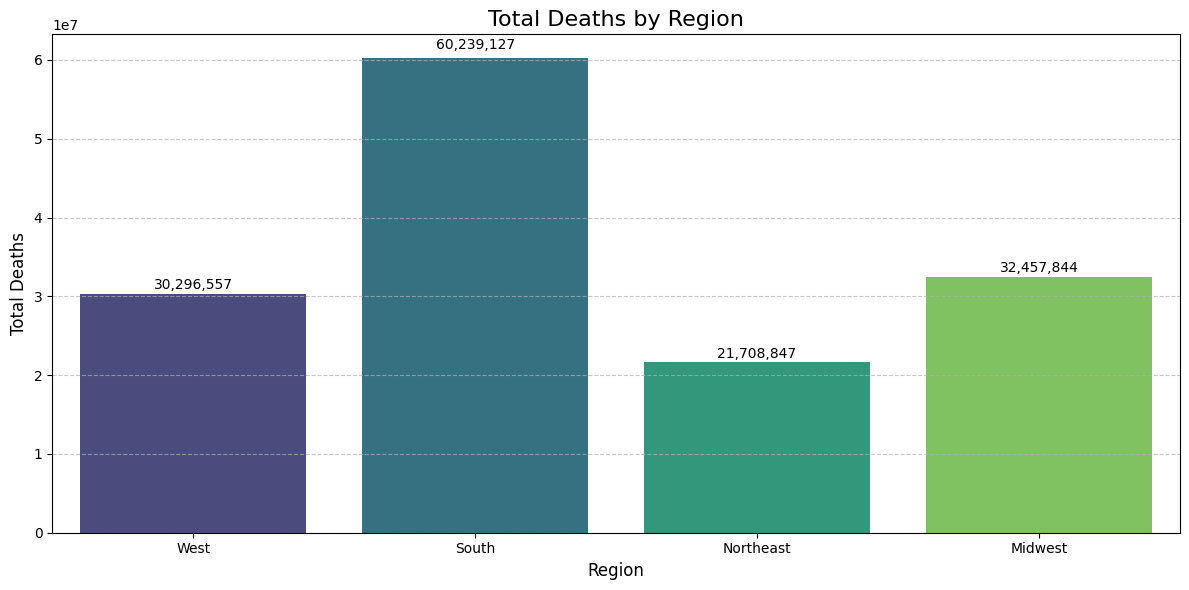

In [186]:
regionTotalDeaths = df.groupby('Region')['Total Deaths'].sum().reset_index()

regionTotalDeaths = regionTotalDeaths.sort_values('Region', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total Deaths', data=regionTotalDeaths, palette='viridis')

plt.title('Total Deaths by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)

for i, value in enumerate(regionTotalDeaths['Total Deaths']):
    plt.text(i, value + (value * 0.02), f'{value:,.0f}', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Kritt\AppData\Local\Temp\ipykernel_28284\688111868.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='COVID-19 Deaths', data=regionCovidDeaths, palette='viridis')


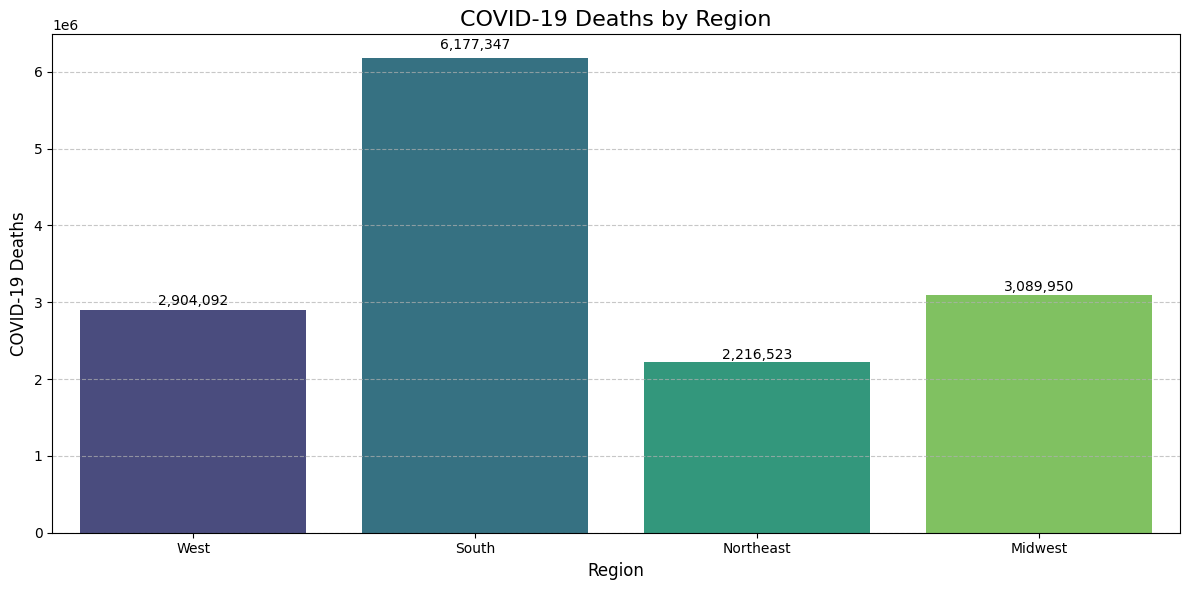

In [187]:
regionCovidDeaths = df.groupby('Region')['COVID-19 Deaths'].sum().reset_index()

regionCovidDeaths = regionCovidDeaths.sort_values('Region', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='COVID-19 Deaths', data=regionCovidDeaths, palette='viridis')

plt.title('COVID-19 Deaths by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('COVID-19 Deaths', fontsize=12)

for i, value in enumerate(regionCovidDeaths['COVID-19 Deaths']):
    plt.text(i, value + (value * 0.02), f'{value:,.0f}', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Kritt\AppData\Local\Temp\ipykernel_28284\807155296.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Percentage', data=regionDeathStats, palette='viridis')


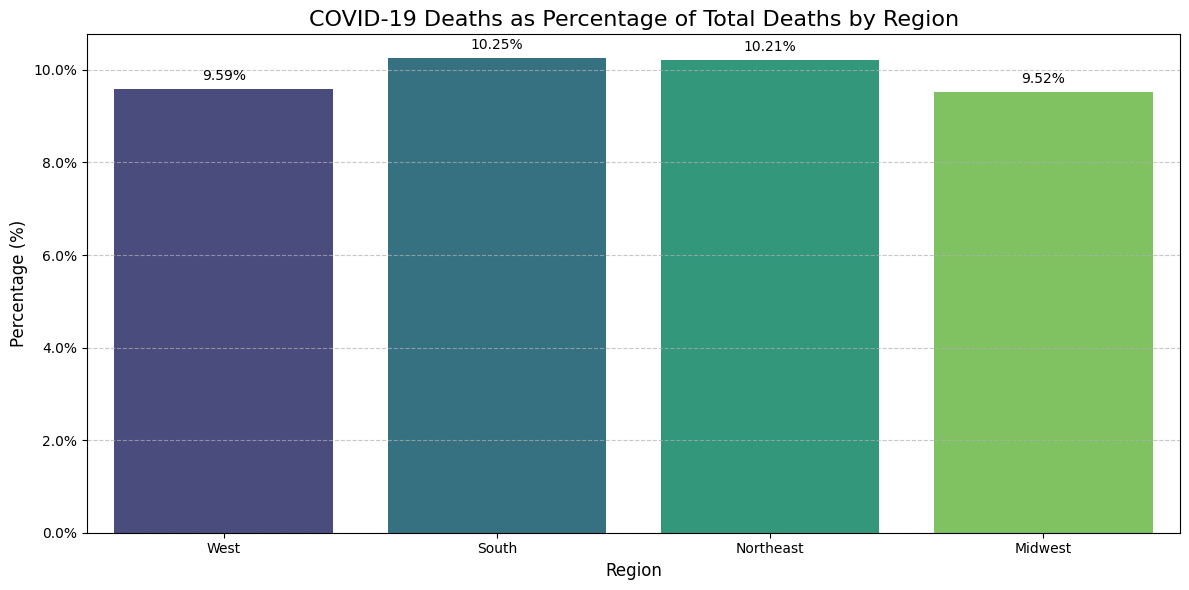

In [188]:
regionCovidDeaths = df.groupby('Region')['COVID-19 Deaths'].sum().reset_index()

regionTotalDeaths = df.groupby('Region')['Total Deaths'].sum().reset_index()

regionDeathStats = pd.merge(regionCovidDeaths, regionTotalDeaths, on='Region')

regionDeathStats['Percentage'] = (regionDeathStats['COVID-19 Deaths'] / regionDeathStats['Total Deaths'] * 100)

regionDeathStats = regionDeathStats.sort_values('Region', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Percentage', data=regionDeathStats, palette='viridis')

plt.title('COVID-19 Deaths as Percentage of Total Deaths by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

for i, value in enumerate(regionDeathStats['Percentage']):
    plt.text(i, value + (value * 0.02), f'{value:.2f}%', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=1))

plt.tight_layout()
plt.show()

C:\Users\Kritt\AppData\Local\Temp\ipykernel_28284\3546227584.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Percentage', data=regionCovidStats, palette='viridis')


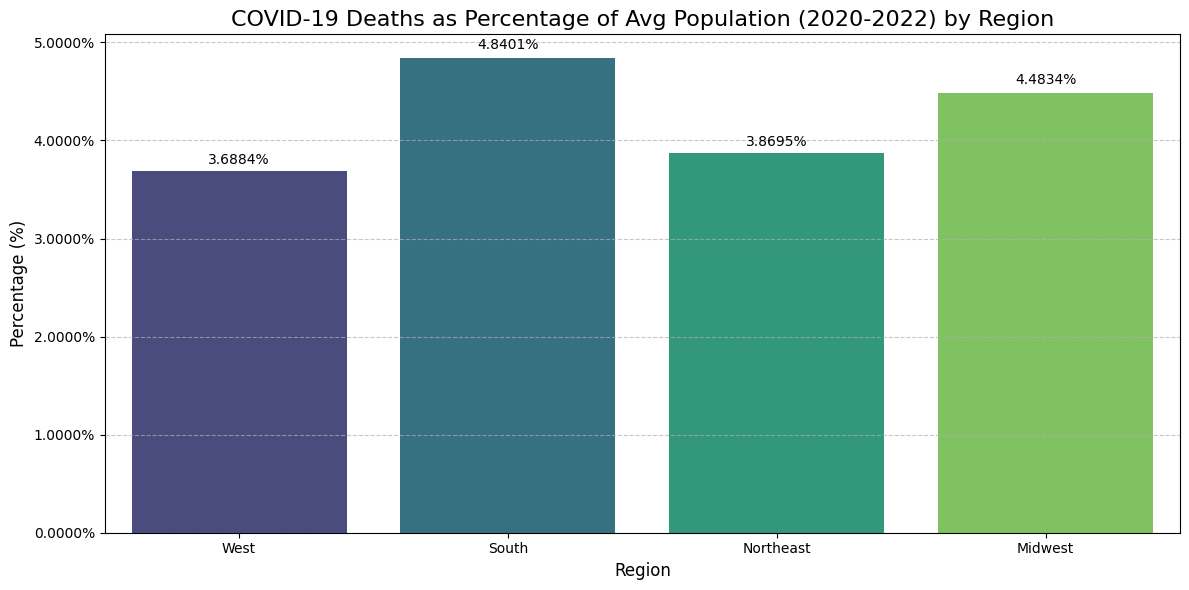

In [189]:
regionPop = regionPop.rename(columns={'state': 'Region'})

regionCovidDeaths = df.groupby('Region')['COVID-19 Deaths'].sum().reset_index()

regionCovidStats = pd.merge(regionCovidDeaths, regionPop[['Region', 'avg']], on='Region')

regionCovidStats['Percentage'] = (regionCovidStats['COVID-19 Deaths'] / regionCovidStats['avg'] * 100)

regionCovidStats = regionCovidStats.sort_values('Region', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Percentage', data=regionCovidStats, palette='viridis')

plt.title('COVID-19 Deaths as Percentage of Avg Population (2020-2022) by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

for i, value in enumerate(regionCovidStats['Percentage']):
    plt.text(i, value + (value * 0.02), f'{value:.4f}%', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=4))

plt.tight_layout()
plt.show()

C:\Users\Kritt\AppData\Local\Temp\ipykernel_28284\99771403.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='DeathRatePer100k', data=regionCovidStats, palette='viridis')


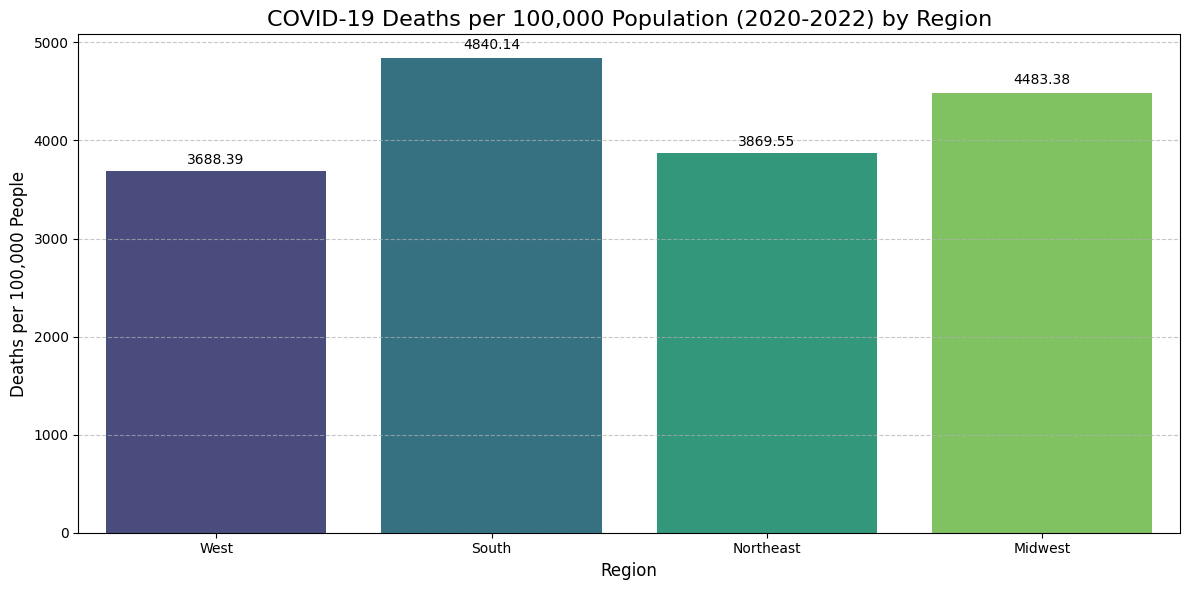

In [190]:
regionPop = regionPop.rename(columns={'state': 'Region'})

regionCovidDeaths = df.groupby('Region')['COVID-19 Deaths'].sum().reset_index()

regionCovidStats = pd.merge(regionCovidDeaths, regionPop[['Region', 'avg']], on='Region')

regionCovidStats['DeathRatePer100k'] = (regionCovidStats['COVID-19 Deaths'] / regionCovidStats['avg']) * 100000

regionCovidStats = regionCovidStats.sort_values('Region', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='DeathRatePer100k', data=regionCovidStats, palette='viridis')

plt.title('COVID-19 Deaths per 100,000 Population (2020-2022) by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Deaths per 100,000 People', fontsize=12)

for i, value in enumerate(regionCovidStats['DeathRatePer100k']):
    plt.text(i, value + (value * 0.02), f'{value:.2f}', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\Kritt\AppData\Local\Temp\ipykernel_28284\1307580245.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='StateCount', data=regionStateCounts, palette='viridis')


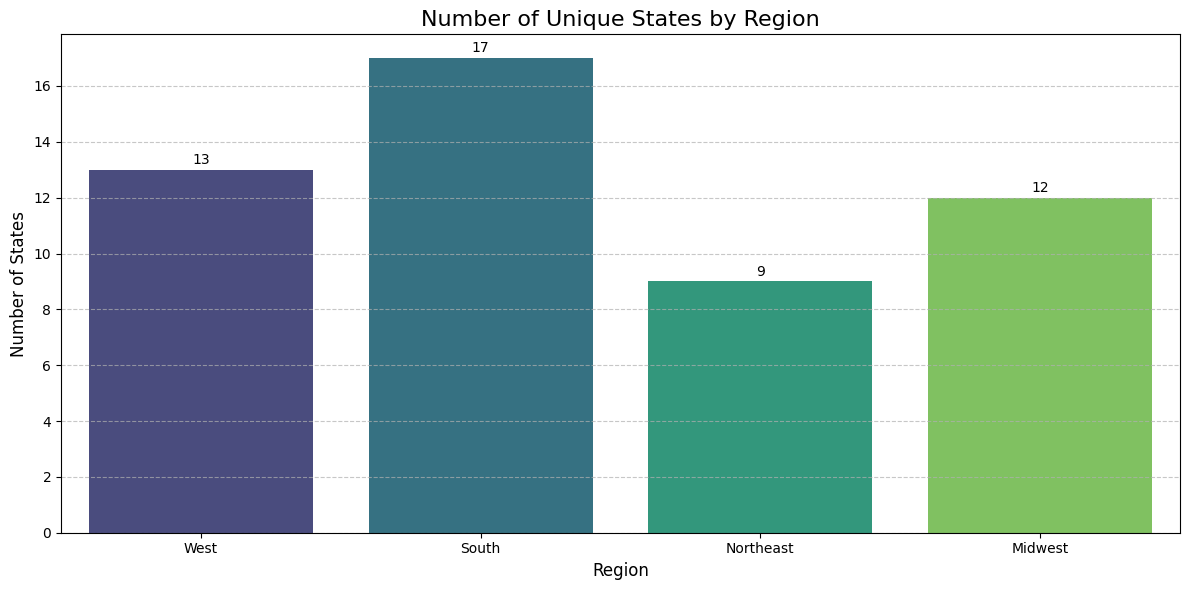

In [191]:
regionStateCounts = df.groupby('Region')['State'].nunique().reset_index()
regionStateCounts.columns = ['Region', 'StateCount']

regionStateCounts = regionStateCounts.sort_values('Region', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='StateCount', data=regionStateCounts, palette='viridis')

plt.title('Number of Unique States by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of States', fontsize=12)

for i, value in enumerate(regionStateCounts['StateCount']):
  plt.text(i, value + 0.2, str(value), ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Hypothesis test

- H0 (Null Hypothesis) คือ Region(ภูมิภาค)ไม่มีผลต่อ COVID-19 Deaths
</br>
- H1 (Alternative Hypothesis) คือ Region(ภูมิภาค)มีผลต่อ COVID-19 Deaths
</br>
- กำหนดให้ค่า alpha เป็น 0.01

- ## Hypothesis test รวมทุกกลุ่ม

In [192]:
from scipy.stats import f_oneway

df_total = df[df['Group'] == "By Total"]

df_total['COVID-19 Deaths'] = pd.to_numeric(df_total['COVID-19 Deaths'], errors='coerce')
df_total = df_total.dropna(subset=['COVID-19 Deaths'])

groups = [group['COVID-19 Deaths'].values for name, group in df_total.groupby('Region')]

F_stat, p_value = f_oneway(*groups)

print("F-statistic:", F_stat)
print("P-value:", p_value)
print("Alpha: 0.01")

F-statistic: 3.294171465329209
P-value: 0.019775138993453047
Alpha: 0.01


C:\Users\Kritt\AppData\Local\Temp\ipykernel_28284\1674967273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['COVID-19 Deaths'] = pd.to_numeric(df_total['COVID-19 Deaths'], errors='coerce')


### สรุป

- ได้ค่า P-value > Alpha สรุปได้ว่าไม่พบความแตกต่างที่มีนัยสำคัญทางสถิติ ระหว่างค่าเฉลี่ยของ COVID-19 Deaths ในแต่ละภูมิภาค </br> หมายความว่า Region ไม่มีผลต่อ COVID-19 Deaths

- ## Hypothesis test แยกกลุ่ม

In [193]:
import pandas as pd
from scipy.stats import ttest_ind
import itertools

df_total = df[df['Group'] == "By Total"]

df_total['COVID-19 Deaths'] = pd.to_numeric(df_total['COVID-19 Deaths'], errors='coerce')
df_total = df_total.dropna(subset=['COVID-19 Deaths'])

groups_dict = {name: group['COVID-19 Deaths'].values for name, group in df_total.groupby('Region')}

region_pairs = list(itertools.combinations(groups_dict.keys(), 2))

alpha = 0.01
alpha_adjusted = alpha / len(region_pairs)
print("จำนวนคู่เปรียบเทียบ:", len(region_pairs))
print("ระดับนัยสำคัญที่ปรับแล้ว:", alpha_adjusted, "\n")

for region1, region2 in region_pairs:
    data1 = groups_dict[region1]
    data2 = groups_dict[region2]
    stat, p_val = ttest_ind(data1, data2, equal_var=False)
    print(f"เปรียบเทียบ {region1} vs {region2}: t-statistic = {stat:.4f}, p-value = {p_val:.4f}")
    if p_val < alpha_adjusted:
        print("  -> มีนัยสำคัญหลังปรับระดับ (reject H0)")
    else:
        print("  -> ไม่มีนัยสำคัญหลังปรับระดับ (fail to reject H0)")
    print("\n")

C:\Users\Kritt\AppData\Local\Temp\ipykernel_28284\3913102015.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['COVID-19 Deaths'] = pd.to_numeric(df_total['COVID-19 Deaths'], errors='coerce')


จำนวนคู่เปรียบเทียบ: 6
ระดับนัยสำคัญที่ปรับแล้ว: 0.0016666666666666668 

เปรียบเทียบ Midwest vs Northeast: t-statistic = -0.0449, p-value = 0.9642
  -> ไม่มีนัยสำคัญหลังปรับระดับ (fail to reject H0)


เปรียบเทียบ Midwest vs South: t-statistic = -2.2189, p-value = 0.0267
  -> ไม่มีนัยสำคัญหลังปรับระดับ (fail to reject H0)


เปรียบเทียบ Midwest vs West: t-statistic = 0.7983, p-value = 0.4249
  -> ไม่มีนัยสำคัญหลังปรับระดับ (fail to reject H0)


เปรียบเทียบ Northeast vs South: t-statistic = -1.8955, p-value = 0.0583
  -> ไม่มีนัยสำคัญหลังปรับระดับ (fail to reject H0)


เปรียบเทียบ Northeast vs West: t-statistic = 0.7417, p-value = 0.4585
  -> ไม่มีนัยสำคัญหลังปรับระดับ (fail to reject H0)


เปรียบเทียบ South vs West: t-statistic = 2.6841, p-value = 0.0074
  -> ไม่มีนัยสำคัญหลังปรับระดับ (fail to reject H0)




### สรุป

- จากการพิสูจน์สมมติฐานของแต่ละกลุ่ม จะพบได้ว่าทุกกลุ่มยอมรับ H0 </br> ดังนั้นจึงสรุปได้ว่า Region ไม่มีผลต่อ COVID-19 Deaths